<a href="https://colab.research.google.com/github/vklohiya/random-notebooks/blob/master/warshall_naive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

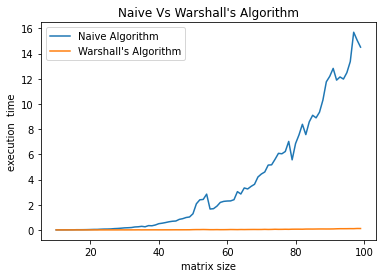

In [ ]:
import random
import time
import matplotlib.pyplot as plt

def matrix_multiplication(X, Y):
    result = [[False for i in range(len(X))]] * len(Y[0])
    # iterating by row of X
    for i in range(len(X)):
        # iterating by coloum by Y
        for j in range(len(Y[0])):
            # iterating by rows of Y
            for k in range(len(Y)):
                result[i][j] += X[i][k] * Y[k][j]
    return result


def matrix_union(X, Y):
    result = [[False for i in range(len(X))]] * len(Y[0])
    # iterating by row of X
    for i in range(len(X)):
        # iterating by coloum by Y
        for j in range(len(Y[0])):
            result[i][j] = X[i][j] or Y[i][j]
    return result


def naive_method(matrix, verbose=True):
    start = time.time()
    n = len(matrix)
    assert (len(row) == n for row in matrix)
    matrix_r = matrix.copy()
    matrix_star = matrix.copy()
    for r in range(1, n):
        matrix_r = matrix_multiplication(matrix_r, matrix)
        matrix_star = matrix_union(matrix_star, matrix_r)
    if verbose:
        print(f"Transitivity Matrix: {matrix_star}")
    end = time.time()
    return end - start


def warshall_method(matrix, verbose=True):
    start = time.time()
    n = len(matrix)
    assert (len(row) == n for row in matrix)
    for k in range(n):
        for i in range(n):
            for j in range(n):
                matrix[i][j] = matrix[i][j] or (matrix[i][k] and matrix[k][j])
    if verbose:
        print(f"Transitivity Matrix: {matrix}")
    end = time.time()
    return end - start


def test_transitive_closure_function(E_size=100, N_range=100, verbose=True):
    """
    This function generates a random relation and tests transitive closure of the relation using
    naive_method() and warshall_method(), and returning the time taken by both the methods.
    """
    # using list comprehension
    # to initializing matrix
    met0 = [[0 for i in range(N_range)]] * N_range
    E = set()
    for j in range(E_size):
        n1 = random.randint(1, N_range)
        n2 = random.randint(1, N_range)
        E.add((n1,n2))
        met0[n1-1][n2-1] = 1
    if verbose:
        print(f"Generated relation with {E_size} edges on {N_range} nodes...")
    t_naive = naive_method(matrix=met0, verbose=verbose)
    t_warshall = warshall_method(matrix=met0, verbose=verbose)
    if verbose:
        print(f"Time taken by naive algorithm: {t_naive}")
        print(f"Time taken by Warshall algorithm: {t_warshall}")

    return t_naive, t_warshall


if __name__ == "__main__":
    execution_time_naive = []
    execution_time_warshall = []
    for i in range(10, 100):
        e_size = random.randint(0, 100)
        t_naive, t_warshall = test_transitive_closure_function(E_size=e_size, N_range=i, verbose=False)
        execution_time_naive.append(t_naive)
        execution_time_warshall.append(t_warshall)

    # plotting the line for naive algorithm
    plt.plot(range(10,100), execution_time_naive, label="Naive Algorithm")


    # plotting the line for warshall algorithm
    plt.plot(range(10,100), execution_time_warshall, label="Warshall's Algorithm")

    # naming the x axis
    plt.xlabel('matrix size')
    # naming the y axis
    plt.ylabel('execution  time')
    # giving a title to my graph
    plt.title("Naive Vs Warshall's Algorithm")

    # show a legend on the plot
    plt.legend()

    # function to show the plot
    plt.show()

The computational complexity of Warshall’s algorithm can easily be computed in terms of bit operations. To find the entry wij from the entries wij , wik , and wkj requires two bit operations. To find all n2 entries of Wk from those of Wk−1 requires 2n^2 bit operations. Because Warshall’s algorithm begins with W0 = MR and computes the sequence of n zero–one matrices W1, W2, . . . , Wn = MR∗ , the total number of bit operations used is n·2n^2 =2n.